In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# About Dataset
This data shows how much a user spends time on their devices using Social Media.

The description for each column is as follows:

age: The age of the user.

gender: The gender identity of the user (Male, Female, Non-binary).

demographics: The type of area the user resides in (Urban, Suburban, Rural).

platform: The social media platform where the user spends time.

income: The yearly income of the user.

indebt: Indicates whether the user is in debt (True or False).


In [12]:
df = pd.read_csv('/content/timesocialmedia', index_col=0)
df # shape as we can see is [1000,7]

,age,gender,time_spent,platform,demographics,income,indebt
0,56,male,3,Instagram,Urban,19774,True
1,46,female,2,Facebook,Urban,10564,True
2,32,male,8,Instagram,Sub_Urban,13258,False
3,60,non-binary,5,Instagram,Urban,12500,False
4,25,male,1,Instagram,Urban,14566,False
...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Rural,18536,False
996,40,non-binary,6,YouTube,Rural,12711,True
997,27,non-binary,5,YouTube,Rural,17595,True
998,61,female,4,YouTube,Sub_Urban,16273,True


In [20]:
df.info() # get info about dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   demographics  1000 non-null   object
 5   income        1000 non-null   int64 
 6   indebt        1000 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 55.7+ KB


In [21]:
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


In [14]:
# Data preprocessing
df.isnull().sum() # we have non NaN value

age             0
gender          0
time_spent      0
platform        0
demographics    0
income          0
indebt          0
dtype: int64

In [18]:
df.time_spent.value_counts() # data is normalized

5    125
4    120
2    112
9    111
6    110
8    109
3    107
7    107
1     99
Name: time_spent, dtype: int64

# Visualization

In [22]:
df.corrwith(df.time_spent).sort_values(ascending=False) # correlation is very small

<ipython-input-22-5135f69073cc>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df.time_spent).sort_values(ascending=False)


time_spent    1.000000
indebt        0.013079
income        0.004757
age          -0.033827
dtype: float64

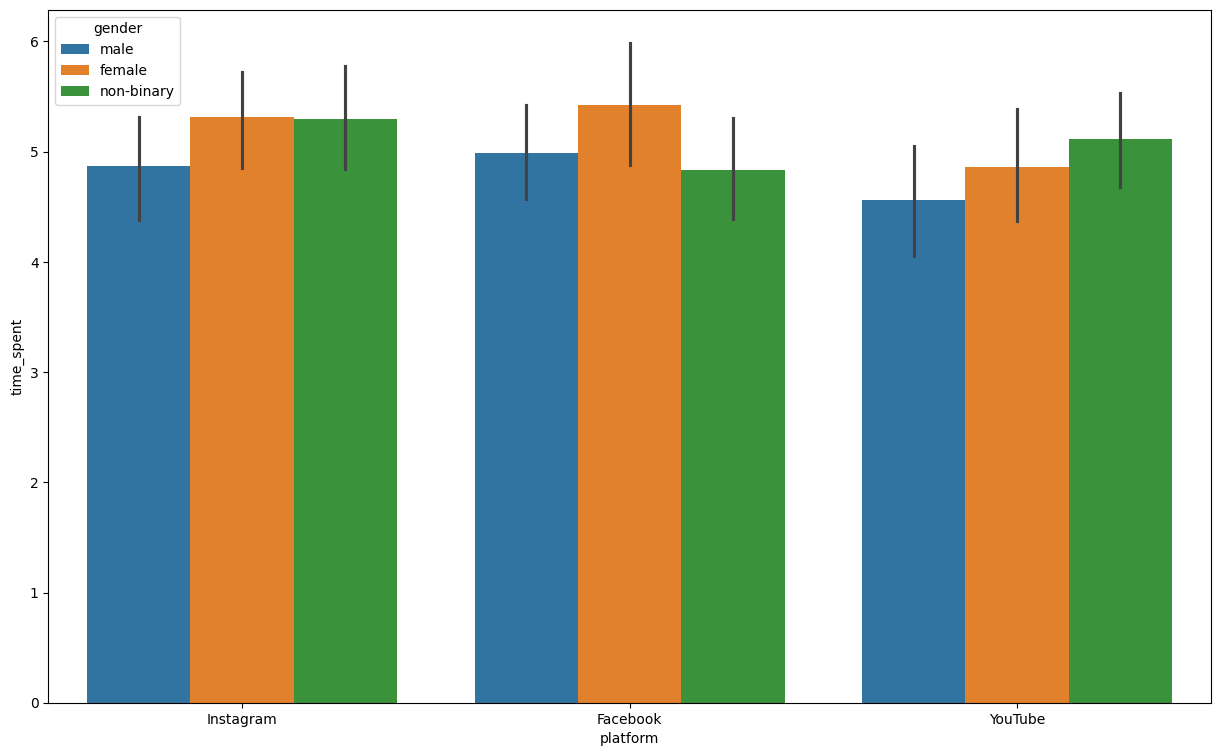

In [32]:
# lets see correlation with platform they used
plt.figure(figsize=(15,9))
sns.barplot(data=df, x='platform', y='time_spent', hue='gender')
plt.show()

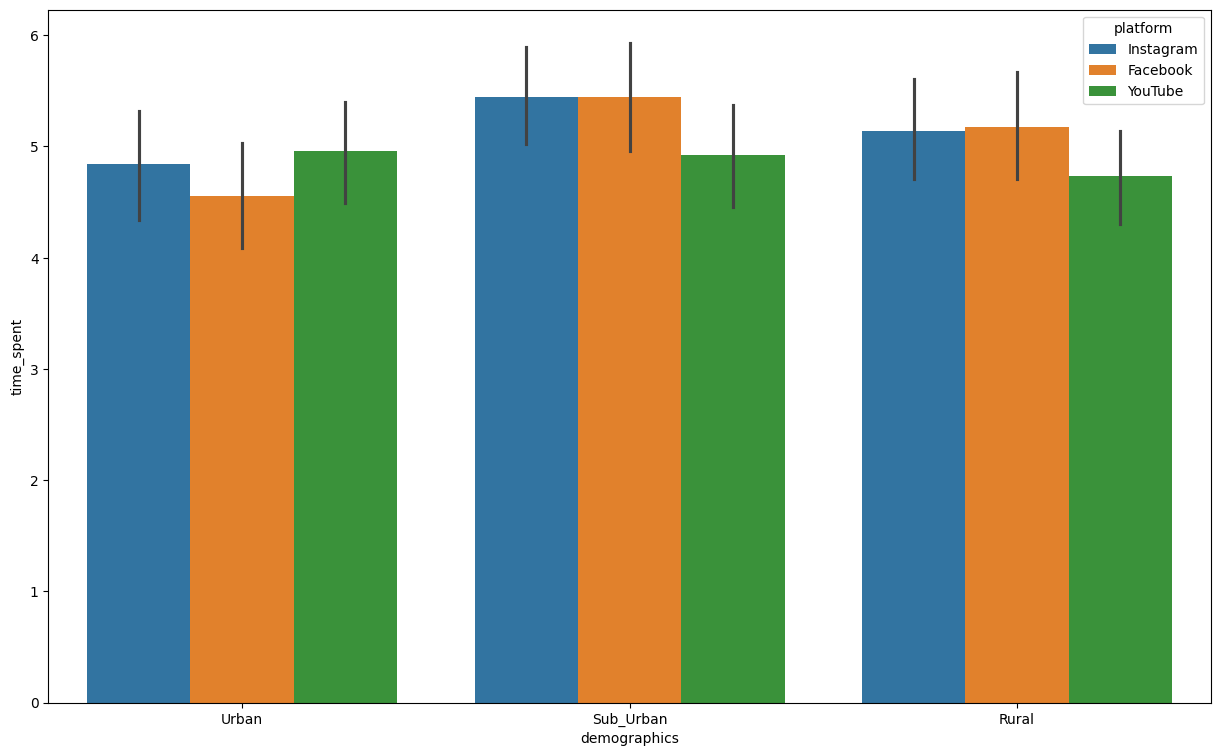

In [34]:
plt.figure(figsize=(15,9))
sns.barplot(data=df, x='demographics', y='time_spent', hue='platform')
plt.show()

### Labelling

In [40]:
value_mapping = {
    'platform': {'Instagram': 1, 'YouTube': 2, 'Facebook':3},
    'demographics': {'Urban': 1, 'Rural': 2, 'Sub_Urban' : 3},
    'gender': {'male': 1, 'female': 0, 'non-binary': 2},
    'indebt': {True : 1, False: 0}
}

# Replace values in multiple columns using the replace() function
df.replace(value_mapping, inplace=True)
df.head(5)

,age,gender,time_spent,platform,demographics,income,indebt
0,56,1,3,1,1,19774,1
1,46,0,2,3,1,10564,1
2,32,1,8,1,3,13258,0
3,60,2,5,1,1,12500,0
4,25,1,1,1,1,14566,0


In [41]:
df.corr() # corr with categorical data

,age,gender,time_spent,platform,demographics,income,indebt
age,1.000000,-0.014291,-0.033827,-0.000797,-0.015864,-0.087391,-0.017055
gender,-0.014291,1.000000,-0.017928,0.088816,0.027198,-0.033675,-0.013502
time_spent,-0.033827,-0.017928,1.000000,-0.017561,0.077508,0.004757,0.013079
platform,-0.000797,0.088816,-0.017561,1.000000,-0.011215,0.082901,-0.017556
demographics,-0.015864,0.027198,0.077508,-0.011215,1.000000,-0.053215,0.004998
income,-0.087391,-0.033675,0.004757,0.082901,-0.053215,1.000000,0.037860
indebt,-0.017055,-0.013502,0.013079,-0.017556,0.004998,0.037860,1.000000


# Standard Scaler and Test-train test

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df)
data

array([[ 1.11288175e+00, -1.22812780e-03, -7.99900839e-01, ...,
        -1.24331825e+00,  1.60938044e+00,  1.00601811e+00],
       [ 3.71652397e-01, -1.22935593e+00, -1.19413487e+00, ...,
        -1.24331825e+00, -1.50510634e+00,  1.00601811e+00],
       [-6.66068696e-01, -1.22812780e-03,  1.17126929e+00, ...,
         1.21869809e+00, -5.94093593e-01, -9.94017892e-01],
       ...,
       [-1.03668337e+00,  1.22689968e+00, -1.14327868e-02, ...,
        -1.23100817e-02,  8.72521947e-01,  1.00601811e+00],
       [ 1.48349643e+00, -1.22935593e+00, -4.05666813e-01, ...,
         1.21869809e+00,  4.25469666e-01,  1.00601811e+00],
       [-1.62966685e+00, -1.22935593e+00,  1.17126929e+00, ...,
        -1.23100817e-02,  4.29189466e-01, -9.94017892e-01]])

In [51]:
x = df.drop('time_spent', axis=1)
y = df['time_spent'] # label
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [53]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.96096392,  1.2583007 , -1.15929106, -1.25842562, -0.63566112,
        -1.03304572],
       [-1.10986401,  1.2583007 ,  1.29423499, -1.25842562,  1.45400786,
         0.96801137],
       [-0.14201346,  1.2583007 ,  0.06747197, -1.25842562,  1.37639839,
        -1.03304572],
       ...,
       [-0.96096392,  1.2583007 ,  0.06747197,  1.22735338,  1.01456127,
        -1.03304572],
       [ 1.12363727, -1.20895557,  0.06747197,  1.22735338,  1.0938727 ,
         0.96801137],
       [ 0.97473718, -1.20895557,  0.06747197,  1.22735338,  0.57783781,
         0.96801137]])

# Machine Learning

In [54]:
# Linear regression by libraries and by sklearn
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

LinearRegression()

In [56]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [58]:
# Model check with libs
# 1 Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR_model, x, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [2.58213528 2.64951534 2.55587794 2.51055207 2.47779314 2.62037369
 2.48762439 2.5562396  2.43857605 2.52305827]
Mean: 2.5401745779060074
Std.dev: 0.06228833552418168


In [67]:
# 2 RMSE
y_predicted = LR_model.predict(x_test)
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.562095896410736

In [65]:
# 3 Example
import math
x_test = scaler.fit_transform(x_test)
predicted_data = LR_model.predict(x_test)
pd.DataFrame({'Prediction': np.floor(predicted_data), 'Real_value': y_test})

,Prediction,Real_value
177,5.0,9
548,4.0,4
568,5.0,1
745,5.0,6
837,5.0,8
...,...,...
363,5.0,8
855,4.0,5
325,4.0,4
497,5.0,1


In [76]:
mpe = np.mean((y_test - predicted_data) / y_test) * 100
print("Mean Percentage Error (MPE): {:.2f}%".format(mpe))

Mean Percentage Error (MPE): -53.95%


In [96]:
# Let's do linear function manually for the sake of practice
# Intitialize Params
b_init = 1
w_init = np.ones(x_train.shape[1])
w_init

array([1., 1., 1., 1., 1., 1.])

In [109]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar
    return cost

In [142]:
cost_function(x_train, y_train, w_init, b_init)

13.981214599974864

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [143]:
# Gradient Descent
def gradient_descent(x,y,w,b):
    m,n = x.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

def gradient_descent_vect(x,y,w,b):
      m, n = x.shape  # (number of examples, number of features)

    # Compute predictions and errors
      predictions = np.dot(x, w) + b
      errors = predictions - y

    # Compute gradients
      dj_dw = np.dot(x.T, errors) / m
      dj_db = np.sum(errors) / m

      return dj_dw, dj_db

In [149]:
w, b = gradient_descent_vect(x_train,y_train,w_init,b_init)
w

array([0.92572356, 1.02736107, 1.11937735, 0.83545767, 0.82986315,
       0.86924817])

In [161]:
def linear_model(x,w,b):
  m,n = x.shape
  predictions = []
  for i in range(m):
    predictions.append(np.dot(x[i], w) + b)
  return np.abs(np.floor(np.array(predictions)))

In [169]:
# Prediction
y_predicted = linear_model(x_test, w, b)
y_predicted.astype(int)

array([ 2,  5,  5,  8,  4,  5,  2,  5,  7,  4,  5,  1,  0,  3,  6,  6,  6,
        2,  4,  8,  4,  2,  3,  5,  3,  5,  4,  1,  5,  2,  4,  1, 10,  7,
        2,  1,  5,  2,  8,  6,  4,  7,  4,  2,  4,  2,  6,  6,  5,  5,  1,
        7,  7,  7,  8,  4,  5,  1,  2,  6,  6,  4,  1, 10,  7,  3,  3,  5,
        5,  5,  3,  6,  6,  7,  4,  5,  5,  5,  5,  1,  5,  4,  7,  4,  6,
        9,  4,  1,  9,  7,  5,  0,  7,  8,  6,  4,  4,  7,  6,  3,  2,  0,
        3,  2,  4,  7,  1,  5,  2,  7,  8,  1,  5,  9,  8,  3,  8,  6,  2,
        5,  5,  4,  7,  3,  7,  5,  8,  2,  4,  4,  5,  4,  5,  6,  4,  5,
        8,  3,  2,  8,  3,  2,  8,  3,  8,  3,  5,  1,  3,  5,  4,  6, 11,
        4,  5,  7,  5,  4,  4,  1,  6,  6,  2,  7,  3,  4,  6,  6,  5,  2,
        4,  2,  6,  2,  4,  3,  5, 10,  4,  5,  1,  4,  1,  3,  5,  6,  5,
        1,  2,  1,  4,  4,  4,  7,  1,  0,  7, 10,  6,  4])

In [174]:
# Check model
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error (MSE): {:.2f}".format(mse))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

Mean Squared Error (MSE): 10.04
Root Mean Squared Error (RMSE): 3.17
